In [ ]:
!pip install selenium

# DATA SCRAPING

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import csv
import time
import random

In [ ]:
# Create a new instance of the Chrome driver
driver = webdriver.Chrome()

# Navigate to the initial page
initial_url = 'https://www.mayoclinic.org/symptom-checker/select-symptom/itt-20009075'
driver.get(initial_url)


In [ ]:
html_options = []
combined_data = []
limit = 100

In [ ]:
for i in range(limit):
    print(i)
    # Locate the headings for adult and child symptoms
    adult_symptoms_heading = driver.find_element(By.XPATH, '//h2[text()="Adult Symptoms"]')
    child_symptoms_heading = driver.find_element(By.XPATH, '//h2[text()="Child Symptoms"]')

    is_adult = random.choice([True, False])

    # Links under both the adult and child symptoms heading
    links_under_adult_symptoms = adult_symptoms_heading.find_elements(By.XPATH, './following-sibling::ol//a')
    links_under_child_symptoms = child_symptoms_heading.find_elements(By.XPATH, './following-sibling::ol//a')
    # click on a random link
    link_to_click = links_under_adult_symptoms if is_adult else links_under_child_symptoms
    random_link_adult = random.choice(link_to_click)

    try:
        random_link_adult.click()

        # Wait for the next page to load
        WebDriverWait(driver, 10).until(EC.staleness_of(random_link_adult))

        # Wait for checkboxes to be present
        checkboxes = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'input[type="checkbox"]'))
        )

    except Exception as e:
        print(f"Error clicking on links: {e}")

    # Example: Select a random subset of checkboxes
    num_checkboxes_to_select = random.randint(1, min(5, len(checkboxes)))  # Select at most 5 checkboxes
    checkboxes_to_select = random.sample(checkboxes, num_checkboxes_to_select)

    try:
        for checkbox in checkboxes_to_select:
            checkbox.click()
    except Exception as e:
        print(f"Error selecting checkboxes: {e}")

    try:
        # Click on the 'FindCause' button
        find_cause_button = driver.find_element(By.ID, 'FindCause')
        find_cause_button.click()

        # Wait for the new page to load
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a')))  # Adjust the locator as needed

        # Get the HTML of the entire page and add to the list
        new_page_html = driver.page_source
        html_options.append(new_page_html)

    except Exception as e:
        print(f"Error clicking on 'FindCause' button: {e}")

    finally:
        # Navigate back to the initial page
        driver.get(initial_url)

        time.sleep(2)

# Close the browser
driver.quit()

0
1
2
3
Error selecting checkboxes: Message: element not interactable
  (Session info: chrome=119.0.6045.200)
Stacktrace:
	GetHandleVerifier [0x00007FF77B9982B2+55298]
	(No symbol) [0x00007FF77B905E02]
	(No symbol) [0x00007FF77B7C045D]
	(No symbol) [0x00007FF77B802B4C]
	(No symbol) [0x00007FF77B7F87BF]
	(No symbol) [0x00007FF77B8220AA]
	(No symbol) [0x00007FF77B7F80CF]
	(No symbol) [0x00007FF77B8222C0]
	(No symbol) [0x00007FF77B83AAA4]
	(No symbol) [0x00007FF77B821E83]
	(No symbol) [0x00007FF77B7F670A]
	(No symbol) [0x00007FF77B7F7964]
	GetHandleVerifier [0x00007FF77BD10AAB+3694587]
	GetHandleVerifier [0x00007FF77BD6728E+4048862]
	GetHandleVerifier [0x00007FF77BD5F173+4015811]
	GetHandleVerifier [0x00007FF77BA347D6+695590]
	(No symbol) [0x00007FF77B910CE8]
	(No symbol) [0x00007FF77B90CF34]
	(No symbol) [0x00007FF77B90D062]
	(No symbol) [0x00007FF77B8FD3A3]
	BaseThreadInitThunk [0x00007FFD0C177344+20]
	RtlUserThreadStart [0x00007FFD0CFA26B1+33]

4
Error selecting checkboxes: Message: el

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.mayoclinic.org/symptom-checker/select-symptom/itt-20009075"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    all_links = soup.find_all('a')
    for link in all_links:
        print(link.get('href'))

    all_paragraphs = soup.find_all('p')
    for paragraph in all_paragraphs:
        print(paragraph.text)

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


#main-content
/
/patient-centered-care
/about-mayo-clinic
/appointments
/appointments/find-a-doctor
/locations
https://www.mayo.edu/research/clinical-trials
https://connect.mayoclinic.org
/patient-visitor-guide
/patient-visitor-guide/billing-insurance
/departments-centers
/departments-centers/international
/about-mayo-clinic/contact
/patient-visitor-guide
/diseases-conditions
/symptoms
/tests-procedures
/drugs-supplements
/healthy-lifestyle
https://mcpress.mayoclinic.org/?utm_source=MC-DotOrg-Nav&utm_medium=Link&utm_campaign=MC-Press&utm_content=MCPRESS
/diseases-conditions
/medical-professionals
/medical-professionals/provider-relations/refer-patient
https://ce.mayo.edu
https://askmayoexpert.mayoclinic.org
https://www.mayocliniclabs.com
https://medprofvideos.mayoclinic.org
/medical-professionals/publications
https://alumniassociation.mayo.edu/
https://ce.mayo.edu
https://www.mayo.edu/research
https://www.mayo.edu/research/faculty
https://www.mayo.edu/research/labs
https://www.mayo.edu

In [ ]:
for i, html_content in enumerate(html_options):
    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract data based on the HTML structure
    data = []
    for symptom_div in soup.find_all('div', class_='check'):
        symptom_name = symptom_div.find('h2').text.strip()

        is_adult_symptom = symptom_name.split()[-1] == 'adults'
        symptom_type = 'Adult' if is_adult_symptom else 'Children'

        for cause_div in symptom_div.find_all('div', class_='expandable factors'):
            cause_name = cause_div.find('h3').text.strip()

            factors = [factor.text.strip() for factor in cause_div.find_all('li')]

            data.append({
                'Symptoms': symptom_name,
                 'Factors': factors,
                'Causes': cause_name,
                'Symptom Type': symptom_type,
            })
    combined_data.extend(data)

csv_file_path = 'symtoms_cause_factors_type.csv'
headers = ['Symptoms', 'Factors', 'Causes', 'Symptom Type']

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=headers)
    csv_writer.writeheader()
    csv_writer.writerows(combined_data)

print(f'Dataset for all options has been saved to: {csv_file_path}')

Dataset for all options has been saved to: symtoms_cause_factors_type.csv


# DATA WRANGLING

In [ ]:
import pandas as pd
df = pd.read_csv ("symtoms_cause_factors_type.csv")
df

,Symptoms,Factors,Causes,Symptom Type
0,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Heart failure,Adult
1,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Pulmonary hypertension,Adult
2,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Anemia,Adult
3,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Bronchitis,Adult
4,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Coronary artery disease,Adult
...,...,...,...,...
2689,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Intestinal obstruction,Children
2690,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Pain is...",Intussusception,Children
2691,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Lactose intolerance,Children
2692,Abdominal pain in children,"['Pain is sharp', 'Pain is crampy', 'Pain is d...",Mittelschmerz,Children


In [ ]:
df.head()

,Symptoms,Factors,Causes,Symptom Type
0,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Heart failure,Adult
1,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Pulmonary hypertension,Adult
2,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Anemia,Adult
3,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Bronchitis,Adult
4,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Coronary artery disease,Adult


In [ ]:
df = df.drop_duplicates()
df

,Symptoms,Factors,Causes,Symptom Type
0,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Heart failure,Adult
1,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Pulmonary hypertension,Adult
2,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Anemia,Adult
3,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Bronchitis,Adult
4,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Coronary artery disease,Adult
...,...,...,...,...
1342,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Intestinal obstruction,NaN
1343,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Pain is...",Intussusception,NaN
1344,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Lactose intolerance,NaN
1345,Abdominal pain in children,"['Pain is sharp', 'Pain is crampy', 'Pain is d...",Mittelschmerz,NaN


In [ ]:
df = df.dropna()
df

,Symptoms,Factors,Causes,Symptom Type
0,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Heart failure,Adult
1,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Pulmonary hypertension,Adult
2,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Anemia,Adult
3,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Bronchitis,Adult
4,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Coronary artery disease,Adult
...,...,...,...,...
444,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Intestinal obstruction,Children
445,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Pain is...",Intussusception,Children
446,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Lactose intolerance,Children
447,Abdominal pain in children,"['Pain is sharp', 'Pain is crampy', 'Pain is d...",Mittelschmerz,Children


In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra whitespaces
    text = ' '.join(text.split())

    return text

df['cleaned_text'] = df['Factors'].apply(clean_text)
print(df['cleaned_text'])

0      Accompanied by fatigue or weakness Accompanied...
1      Accompanied by fatigue or weakness Accompanied...
2      Accompanied by fatigue or weakness Problem is ...
3      Accompanied by fatigue or weakness Problem is ...
4      Accompanied by fatigue or weakness Problem is ...
                             ...                        
444    Accompanied by nausea or vomiting Onset is rec...
445    Accompanied by nausea or vomiting Pain is extr...
446    Accompanied by nausea or vomiting Onset is int...
447    Pain is sharp Pain is crampy Pain is dull Pain...
448    Accompanied by nausea or vomiting Onset is rec...
Name: cleaned_text, Length: 432, dtype: object


In [ ]:
# Stemming and Lemmatization
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def apply_stemming(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['stemmed_text'] = df['cleaned_text'].apply(apply_stemming)
print(df['stemmed_text'])

0      accompani by fatigu or weak accompani by swell...
1      accompani by fatigu or weak accompani by swell...
2      accompani by fatigu or weak problem is new or ...
3      accompani by fatigu or weak problem is new or ...
4      accompani by fatigu or weak problem is new or ...
                             ...                        
444    accompani by nausea or vomit onset is recent h...
445    accompani by nausea or vomit pain is extrem on...
446    accompani by nausea or vomit onset is intermit...
447    pain is sharp pain is crampi pain is dull pain...
448    accompani by nausea or vomit onset is recent h...
Name: stemmed_text, Length: 432, dtype: object


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# remove stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['no_stop_words_text'] = df['stemmed_text'].apply(remove_stop_words)
print(df['no_stop_words_text'])

0      accompani fatigu weak accompani swell leg ankl...
1      accompani fatigu weak accompani swell leg ankl...
2      accompani fatigu weak problem new recent probl...
3      accompani fatigu weak problem new recent probl...
4      accompani fatigu weak problem new recent probl...
                             ...                        
444    accompani nausea vomit onset recent hour day a...
445    accompani nausea vomit pain extrem onset inter...
446    accompani nausea vomit onset intermitt episod ...
447    pain sharp pain crampi pain dull pain intermit...
448    accompani nausea vomit onset recent hour day t...
Name: no_stop_words_text, Length: 432, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define a function to tokenize text into words
def tokenize_text(text):
    words = text.split()
    return words

# Apply tokenization to the cleaned text
df['tokenized_text'] = df['no_stop_words_text'].apply(tokenize_text)
print(df['tokenized_text'])

0      [accompani, fatigu, weak, accompani, swell, le...
1      [accompani, fatigu, weak, accompani, swell, le...
2      [accompani, fatigu, weak, problem, new, recent...
3      [accompani, fatigu, weak, problem, new, recent...
4      [accompani, fatigu, weak, problem, new, recent...
                             ...                        
444    [accompani, nausea, vomit, onset, recent, hour...
445    [accompani, nausea, vomit, pain, extrem, onset...
446    [accompani, nausea, vomit, onset, intermitt, e...
447    [pain, sharp, pain, crampi, pain, dull, pain, ...
448    [accompani, nausea, vomit, onset, recent, hour...
Name: tokenized_text, Length: 432, dtype: object


# FEATURE EXTRACTION

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectors = tfidf_vectorizer.fit_transform(df['cleaned_text'])
print(tfidf_vectors)

  (0, 589)	0.12569037038432898
  (0, 212)	0.2331947333328575
  (0, 585)	0.16447255043127662
  (0, 244)	0.14548469131203265
  (0, 410)	0.28066787477984984
  (0, 273)	0.15010535651360893
  (0, 482)	0.13751756560485298
  (0, 401)	0.1662156289011913
  (0, 528)	0.1862845455856395
  (0, 108)	0.09246417009120354
  (0, 538)	0.1181355188469838
  (0, 378)	0.061928648721924
  (0, 91)	0.11221795993564
  (0, 167)	0.14890247434931636
  (0, 325)	0.15528740357967202
  (0, 542)	0.10401633817071793
  (0, 323)	0.14440363374682838
  (0, 596)	0.10883883646914197
  (0, 554)	0.09821110143077891
  (0, 417)	0.10977732464307849
  (0, 367)	0.10657907675785512
  (0, 278)	0.07901036914074593
  (0, 400)	0.08882797484872323
  (0, 186)	0.19581266209653436
  (0, 21)	0.1862845455856395
  :	:
  (430, 451)	0.2176212784082965
  (430, 304)	0.281996677009145
  (430, 151)	0.2274718410607085
  (430, 260)	0.11676892961955995
  (430, 378)	0.4097033720710332
  (430, 278)	0.5227114644612095
  (430, 372)	0.058760556150098925
  (43

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
bow_vectors = count_vectorizer.fit_transform(df['cleaned_text'])
print(bow_vectors)

  (0, 4)	7
  (0, 83)	8
  (0, 183)	1
  (0, 372)	5
  (0, 583)	1
  (0, 513)	1
  (0, 363)	1
  (0, 290)	1
  (0, 23)	1
  (0, 21)	1
  (0, 186)	1
  (0, 400)	1
  (0, 278)	1
  (0, 367)	1
  (0, 417)	1
  (0, 554)	1
  (0, 596)	1
  (0, 323)	1
  (0, 542)	1
  (0, 325)	1
  (0, 167)	1
  (0, 91)	1
  (0, 378)	1
  (0, 538)	1
  (0, 108)	1
  :	:
  (430, 304)	1
  (430, 451)	1
  (430, 112)	1
  (430, 311)	1
  (430, 1)	1
  (430, 272)	1
  (430, 163)	1
  (431, 4)	3
  (431, 83)	4
  (431, 372)	2
  (431, 278)	1
  (431, 554)	1
  (431, 596)	1
  (431, 542)	1
  (431, 414)	1
  (431, 187)	1
  (431, 340)	1
  (431, 577)	1
  (431, 129)	1
  (431, 155)	1
  (431, 88)	1
  (431, 200)	1
  (431, 369)	1
  (431, 256)	1
  (431, 121)	1


# MACHINE LEARNING MODEL

In [ ]:
# Perform one-hot encoding for 'Symptom Type'
new_df = pd.get_dummies(df, columns=['Symptom Type'], drop_first=True)
new_df

,Symptoms,Factors,Causes,Symptom Type_Children
0,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Heart failure,False
1,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Accomp...",Pulmonary hypertension,False
2,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Anemia,False
3,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Bronchitis,False
4,Shortness of breath in adults,"['Accompanied by fatigue or weakness', 'Proble...",Coronary artery disease,False
...,...,...,...,...
1342,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Intestinal obstruction,False
1343,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Pain is...",Intussusception,False
1344,Abdominal pain in children,"['Accompanied by nausea or vomiting', 'Onset i...",Lactose intolerance,False
1345,Abdominal pain in children,"['Pain is sharp', 'Pain is crampy', 'Pain is d...",Mittelschmerz,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

X_text = new_df[['Symptoms', 'Causes', 'Factors']]
y = new_df['Symptom Type_Children'].astype(int)

# One-hot encode categorical variables
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)

X_causes_encoded = pd.DataFrame(vectorizer.fit_transform(X_text['Causes']).toarray(), columns=vectorizer.get_feature_names_out())
X_symptoms_encoded = pd.DataFrame(vectorizer.fit_transform(X_text['Symptoms']).toarray(), columns=vectorizer.get_feature_names_out())
X_factors_encoded = pd.DataFrame(vectorizer.fit_transform(X_text['Factors']).toarray(), columns=vectorizer.get_feature_names_out())

X_final = pd.concat([X_symptoms_encoded, X_factors_encoded, X_causes_encoded], axis=1)

E:\Softwares\Anaconda1\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
E:\Softwares\Anaconda1\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
E:\Softwares\Anaconda1\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70       128
           1       0.24      0.29      0.26        45

    accuracy                           0.57       173
   macro avg       0.48      0.48      0.48       173
weighted avg       0.60      0.57      0.58       173



E:\Softwares\Anaconda1\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


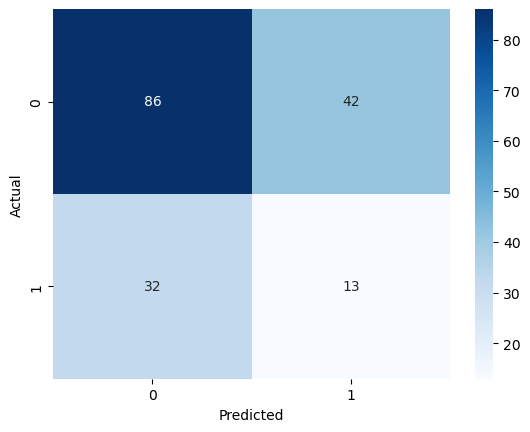

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:\n", classification_report_svm)


SVM Accuracy: 0.74
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       128
           1       0.00      0.00      0.00        45

    accuracy                           0.74       173
   macro avg       0.37      0.50      0.43       173
weighted avg       0.55      0.74      0.63       173



E:\Softwares\Anaconda1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Softwares\Anaconda1\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


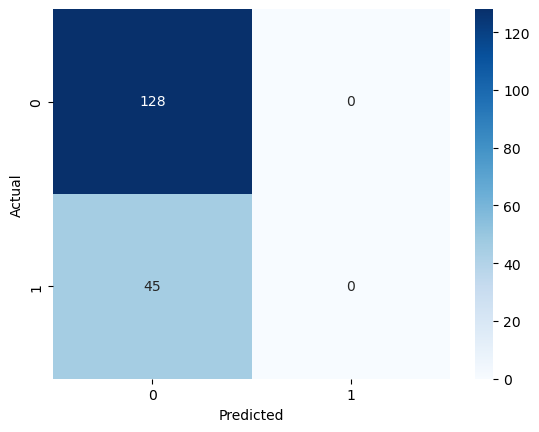

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# DEEP LEARNING MODELS

In [ ]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [ ]:
import seaborn as sns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_prob = model.predict(X_test_scaled)
y_pred_ann = (y_pred_prob > 0.5).astype(int)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
classification_report_ann = classification_report(y_test, y_pred_ann)

print(f"ANN Accuracy: {accuracy_ann:.2f}")
print("ANN Classification Report:\n", classification_report_ann)

Epoch 1/10
18/18 [==============================] - 1s 17ms/step - loss: 0.7036 - accuracy: 0.5525 - val_loss: 0.6150 - val_accuracy: 0.6691
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5817 - accuracy: 0.7228 - val_loss: 0.6290 - val_accuracy: 0.6691
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5561 - accuracy: 0.7246 - val_loss: 0.6455 - val_accuracy: 0.6691
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5342 - accuracy: 0.7228 - val_loss: 0.6601 - val_accuracy: 0.6691
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.7246 - val_loss: 0.6729 - val_accuracy: 0.6619
Epoch 6/10
18/18 [==============================] - 0s 7ms/step - loss: 0.4945 - accuracy: 0.7301 - val_loss: 0.6966 - val_accuracy: 0.6259
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 0.4782 - accuracy: 0.7391 - val_loss: 0.7299 - val_accuracy: 0.6187
Epoch 8/10
18/18 [=

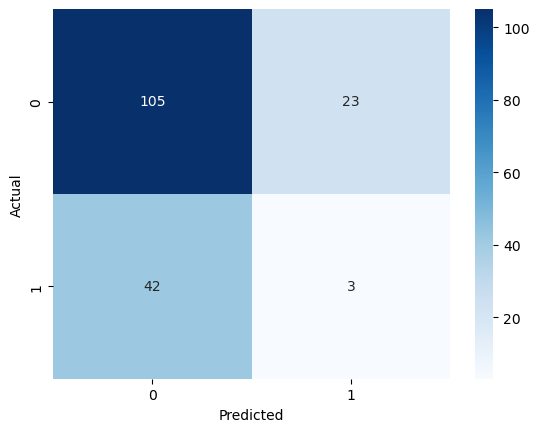

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Combine text features into a single column for tokenization
X_combined_text = X_text['Symptoms'] + ' ' + X_text['Causes'] + ' ' + X_text['Factors']

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_combined_text)
X_sequences = tokenizer.texts_to_sequences(X_combined_text)

# Pad sequences to have the same length
X_padded = pad_sequences(X_sequences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build a simple Recurrent Neural Network (RNN) using LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=X_padded.shape[1]))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 5s 93ms/step - loss: 0.6745 - accuracy: 0.7210 - val_loss: 0.6492 - val_accuracy: 0.6691
Epoch 2/10
18/18 [==============================] - 1s 64ms/step - loss: 0.6010 - accuracy: 0.7210 - val_loss: 0.6360 - val_accuracy: 0.6691
Epoch 3/10
18/18 [==============================] - 1s 67ms/step - loss: 0.5641 - accuracy: 0.7210 - val_loss: 0.6079 - val_accuracy: 0.6691
Epoch 4/10
18/18 [==============================] - 1s 57ms/step - loss: 0.5428 - accuracy: 0.7210 - val_loss: 0.5859 - val_accuracy: 0.6691
Epoch 5/10
18/18 [==============================] - 1s 54ms/step - loss: 0.5102 - accuracy: 0.7210 - val_loss: 0.5929 - val_accuracy: 0.6691
Epoch 6/10
18/18 [==============================] - 1s 54ms/step - loss: 0.4938 - accuracy: 0.7210 - val_loss: 0.6215 - val_accuracy: 0.6691
Epoch 7/10
18/18 [==============================] - 1s 54ms/step - loss: 0.4518 - accuracy: 0.7210 - val_loss: 0.5547 - val_accuracy: 0.6691
Epoch 8/10
18

In [ ]:
# Evaluate the model on the test set
y_pred_prob_rnn = model.predict(X_test)
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)  # Threshold probabilities to get classes

accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
classification_report_rnn = classification_report(y_test, y_pred_rnn)

print(f"RNN Accuracy: {accuracy_rnn:.2f}")
print("RNN Classification Report:\n", classification_report_rnn)

6/6 [==============================] - 0s 20ms/step
RNN Accuracy: 0.73
RNN Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.98      0.85       128
           1       0.33      0.02      0.04        45

    accuracy                           0.73       173
   macro avg       0.54      0.50      0.44       173
weighted avg       0.64      0.73      0.64       173



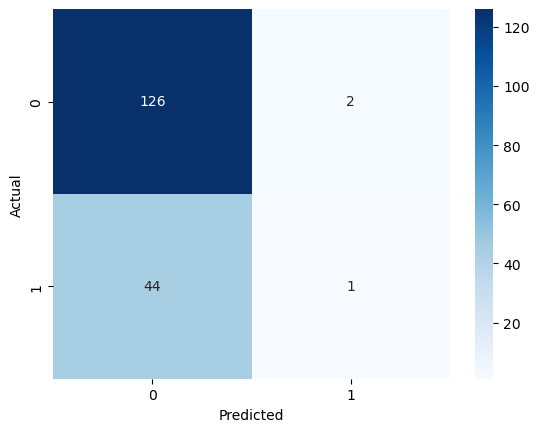

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rnn), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# PLOTLY

In [ ]:
import plotly.express as px

fig_target_distribution = px.histogram(new_df, x='Symptom Type_Children', title='Distribution of Target Variable',
                                       labels={'Symptom Type_Children': 'Target Variable'}, template='plotly_dark')
fig_target_distribution.show()


In [ ]:
# Visualize the distribution of 'Symptoms'
fig_symptoms_distribution = px.histogram(new_df, x='Symptoms', title='Symptoms Distribution', template='plotly_dark')
fig_symptoms_distribution.show()

In [ ]:
# Visualize the distribution of 'Causes'
fig_causes_distribution = px.histogram(new_df, x='Causes', title='Causes Distribution', template='plotly_dark')
fig_causes_distribution.show()


In [ ]:
# Visualize the distribution of 'Factors'
fig_factors_distribution = px.histogram(new_df, x='Factors', title='Factors Distribution', template='plotly_dark')
fig_factors_distribution.show()
